In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', 50)


In [2]:
df = pd.read_csv('../data/waterPollution.csv')
df

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.092466,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,89.908300,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,18.901608,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,307.307000,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [3]:
df.shape

(20000, 29)

In [4]:
df.columns

Index(['parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
       'procedureAnalysedFraction', 'procedureAnalysedMedia', 'resultUom',
       'phenomenonTimeReferenceYear', 'parameterSamplingPeriod',
       'resultMeanValue', 'waterBodyIdentifier', 'Country',
       'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [5]:
df.dtypes

parameterWaterBodyCategory                      object
observedPropertyDeterminandCode                 object
procedureAnalysedFraction                       object
procedureAnalysedMedia                          object
resultUom                                       object
phenomenonTimeReferenceYear                      int64
parameterSamplingPeriod                         object
resultMeanValue                                float64
waterBodyIdentifier                             object
Country                                         object
PopulationDensity                              float64
TerraMarineProtected_2016_2018                 float64
TouristMean_1990_2020                          float64
VenueCount                                     float64
netMigration_2011_2018                         float64
droughts_floods_temperature                    float64
literacyRate_2010_2018                         float64
combustibleRenewables_2009_2014                float64
gdp       

In [6]:
df.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,2.286783e+12,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,9.318293e+11,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,2.887150e+10,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,1.464509e+12,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,3.781699e+12,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [7]:
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [8]:
# I want to see the columns that i can work with and those that would be difficult to work with

numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()
potential_numeric_columns = [
    col for col in df.columns if col not in numeric_columns 
    and pd.to_numeric(df[col], errors="coerce").notna().all()
]
non_numeric_columns = [
    col for col in df.columns if col not in numeric_columns + potential_numeric_columns
]


print(f"{'Numeric Columns':<50} {'Potentially Numeric Columns':<50} {'Non-numeric Columns':<50}")
print(f"{'------------------':<50} {'--------------------------------':<50} {'---------------------------':<50}")
for i in range(len(max(numeric_columns, potential_numeric_columns, non_numeric_columns))):
    print(f"{numeric_columns[i]:<50} {potential_numeric_columns[i] if i <= len(potential_numeric_columns)-1 else '':<50} {non_numeric_columns[i] if i <= len(non_numeric_columns)-1 else '':<50}")

    

Numeric Columns                                    Potentially Numeric Columns                        Non-numeric Columns                               
------------------                                 --------------------------------                   ---------------------------                       
phenomenonTimeReferenceYear                                                                           parameterWaterBodyCategory                        
resultMeanValue                                                                                       observedPropertyDeterminandCode                   
PopulationDensity                                                                                     procedureAnalysedFraction                         
TerraMarineProtected_2016_2018                                                                        procedureAnalysedMedia                            
TouristMean_1990_2020                                                             

## Columns ranked for their usefulness


```python
# Columns likely suitable for linear regression

columns_suitable = [
    "phenomenonTimeReferenceYear",  # Represents time; may need scaling or encoding.
    "resultMeanValue",              # Key numeric variable; could be target or feature.
    "PopulationDensity",            # Strong predictor; ensure normalized.
    "TerraMarineProtected_2016_2018",  # Numeric; ensure it's meaningful and not sparse.
    "TouristMean_1990_2020",        # Good for socio-economic/environmental questions.
    "VenueCount",                   # Useful feature; normalize if needed.
    "netMigration_2011_2018",       # Check for outliers or missing data.
    "droughts_floods_temperature",  # May require scaling; check relevance to target.
    "literacyRate_2010_2018",       # Likely important for socio-economic analysis.
    "combustibleRenewables_2009_2014"  # Inspect for completeness and variation.
]

# Columns requiring transformation or careful consideration
columns_requiring_transformation = [
    "composition_food_organic_waste_percent",  # Percentages; watch for multicollinearity.
    "composition_glass_percent",              # Same as above.
    "composition_metal_percent",              # Same as above.
    "composition_other_percent",              # Same as above.
    "composition_paper_cardboard_percent",    # Same as above.
    "composition_plastic_percent",            # Same as above.
    "composition_rubber_leather_percent",     # Same as above.
    "composition_wood_percent",               # Same as above.
    "composition_yard_garden_green_waste_percent",  # May have low variation.
    "waste_treatment_recycling_percent"       # Check for sparsity or scaling needs.
]

# Columns with potential issues
columns_with_issues = [
    "phenomenonTimeReferenceYear",            # May behave like categorical; consider transformation.
    "composition_yard_garden_green_waste_percent",  # Could be sparse; verify variation.
    "resultMeanValue",                        # If used as target, ensure no data leakage.
    "combustibleRenewables_2009_2014"         # Sparse data can reduce usability.
]
```



In [9]:
df

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.092466,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,89.908300,FRHR239,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,18.901608,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,307.307000,FRHR241,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [10]:
df[["phenomenonTimeReferenceYear", "composition_food_organic_waste_percent",  "phenomenonTimeReferenceYear"]]

,phenomenonTimeReferenceYear,composition_food_organic_waste_percent,phenomenonTimeReferenceYear
0,2009,32.0,2009
1,2009,32.0,2009
2,2009,32.0,2009
3,2009,32.0,2009
4,2009,49.0,2009
...,...,...,...
19995,2009,32.0,2009
19996,2009,32.0,2009
19997,2009,32.0,2009
19998,2009,32.0,2009


# Columns to Drop
Why:
Drop columns that are irrelevant, redundant, or have too many missing values to be useful.

+ Columns to drop:


    - `procedureAnalysedMedia`: Likely categorical with limited variation.
    - `parameterSamplingPeriod`: Redundant or not meaningful for regression.
    - `procedureAnalysedFraction`: Limited information contributing to the prediction.
    - `Country`: A categorical column that doesn’t numerically impact regression.

In [11]:
# Dropping these

columns_to_drop = ['procedureAnalysedMedia', 'parameterSamplingPeriod', 'procedureAnalysedFraction', 'Country']
df.drop(columns=columns_to_drop, inplace=True, axis=1)
df

,parameterWaterBodyCategory,observedPropertyDeterminandCode,resultUom,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.063310,FRDR609,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.046733,FRFR238,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,{massRatio},2009,132.859000,FRFR238,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,mg{NO3}/L,2009,11.578376,FRFR327C,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,mmol/L,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.092466,FRHR239,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,%,2009,89.908300,FRHR239,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,mg{NO3}/L,2009,18.901608,FRHR241,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,{massRatio},2009,307.307000,FRHR241,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


# Columns with Issues
Why:
    These columns have specific challenges (e.g., skewed distributions, mixed data types, or outliers). Each requires tailored handling.

+ Columns with issues:
    - `PopulationDensity`: Check for outliers or skewed distribution; apply transformations (e.g., log transform).
    - `gdp`: Possible missing values or skewness; fill missing values and normalize.
    - `combustibleRenewables_2009_2014`: May have extreme values or missing data; fill or cap.
    - `composition_*`: Percentages need to add up to 100%. Normalize or recheck for invalid values.

In [12]:
# Handle missing values
df['PopulationDensity'] = df['PopulationDensity'].fillna(df['PopulationDensity'].mean())
df['gdp'] = df['gdp'].fillna(df['gdp'].median())


# Handle skewed distributions
df['PopulationDensity'] = np.log1p(df['PopulationDensity'])
df['gdp'] = np.log1p(df['gdp'])

# Normalize composition columns if they don't sum to 100
composition_columns = [col for col in df.columns if col.startswith('composition_')]
df[composition_columns] = df[composition_columns].div(df[composition_columns].sum(axis=1), axis=0) * 100

df


,parameterWaterBodyCategory,observedPropertyDeterminandCode,resultUom,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.063310,FRDR609,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.046733,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,{massRatio},2009,132.859000,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,mg{NO3}/L,2009,11.578376,FRFR327C,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,mmol/L,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.092466,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,%,2009,89.908300,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,mg{NO3}/L,2009,18.901608,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,{massRatio},2009,307.307000,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [13]:
df.shape

(20000, 25)

In [14]:
df.dtypes

parameterWaterBodyCategory                      object
observedPropertyDeterminandCode                 object
resultUom                                       object
phenomenonTimeReferenceYear                      int64
resultMeanValue                                float64
waterBodyIdentifier                             object
PopulationDensity                              float64
TerraMarineProtected_2016_2018                 float64
TouristMean_1990_2020                          float64
VenueCount                                     float64
netMigration_2011_2018                         float64
droughts_floods_temperature                    float64
literacyRate_2010_2018                         float64
combustibleRenewables_2009_2014                float64
gdp                                            float64
composition_food_organic_waste_percent         float64
composition_glass_percent                      float64
composition_metal_percent                      float64
compositio

In [15]:
df['resultUom'].unique()

array(['mg{NO2}/L', '{massRatio}', 'mg{NO3}/L', 'mmol/L', 'mg{P}/L', '%',
       'mg{N}/L', '[pH]', 'mg{Si}/L', 'mg{O2}/L', 'mg{NH4}/L', 'ug/L',
       'uS/cm', 'mg/L', 'Cel', 'mg{C}/L', 'mg{NH3}/L', 'mg{PO4}/L',
       'mg{CaCO3}/L'], dtype=object)

In [16]:
df.columns

Index(['parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
       'resultUom', 'phenomenonTimeReferenceYear', 'resultMeanValue',
       'waterBodyIdentifier', 'PopulationDensity',
       'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020', 'VenueCount',
       'netMigration_2011_2018', 'droughts_floods_temperature',
       'literacyRate_2010_2018', 'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [17]:
df[['resultUom', 'resultMeanValue']].head()

,resultUom,resultMeanValue
0,mg{NO2}/L,0.063310
1,mg{NO2}/L,0.046733
2,{massRatio},132.859000
3,mg{NO3}/L,11.578376
4,mmol/L,0.206800


In [18]:
for i in list(df['resultUom'].unique()):
    print(f"{i:<30} {(df['resultUom'] == i).sum()}" )   

mg{NO2}/L                      1266
{massRatio}                    1450
mg{NO3}/L                      1289
mmol/L                         154
mg{P}/L                        2477
%                              1145
mg{N}/L                        3713
[pH]                           1157
mg{Si}/L                       378
mg{O2}/L                       1609
mg{NH4}/L                      1110
ug/L                           1670
uS/cm                          738
mg/L                           113
Cel                            898
mg{C}/L                        558
mg{NH3}/L                      260
mg{PO4}/L                      6
mg{CaCO3}/L                    9


In [19]:
# Remove rows with celcius rows
df = df[df['resultUom'] != 'Cel'].copy()
df = df[df['resultUom'] != '[pH]'].copy()
df = df[df['resultUom'] != 'uS/cm'].copy()


# Removing rows with values less than 50
threshold = 50  # For example, keep only units with 50 or more rows
unit_counts = df['resultUom'].value_counts()

# Filter out rows with sparse units
df_filtered = df[df['resultUom'].isin(unit_counts[unit_counts >= threshold].index)]


df

,parameterWaterBodyCategory,observedPropertyDeterminandCode,resultUom,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.063310,FRDR609,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.046733,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,{massRatio},2009,132.859000,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,mg{NO3}/L,2009,11.578376,FRFR327C,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,mmol/L,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,RW,EEA_3161-02-2,mg{N}/L,2009,1.283000,ES080MSPF18-28,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
19995,RW,CAS_14797-65-0,mg{NO2}/L,2009,0.092466,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,%,2009,89.908300,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,mg{NO3}/L,2009,18.901608,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [20]:
df.shape

(17207, 25)

In [21]:
df['resultUom'].unique()

array(['mg{NO2}/L', '{massRatio}', 'mg{NO3}/L', 'mmol/L', 'mg{P}/L', '%',
       'mg{N}/L', 'mg{Si}/L', 'mg{O2}/L', 'mg{NH4}/L', 'ug/L', 'mg/L',
       'mg{C}/L', 'mg{NH3}/L', 'mg{PO4}/L', 'mg{CaCO3}/L'], dtype=object)

In [22]:
# Conversion rates dictionary, modified for your situation
unit_conversion_dict = {
    'mg{NO2}/L': 1,              # mg{NO2}/L is already in mg/L, so no conversion needed
    'mg{NO3}/L': 1,              # mg{NO3}/L is already in mg/L, so no conversion needed
    'mmol/L': 46,                # Example: Conversion from mmol/L to mg/L for NO2 (46 g/mol)
    'mg{P}/L': 1,                # mg{P}/L is already in mg/L, so no conversion needed
    '%': 0.01,                   # % to fraction (divide by 100)
    'mg{N}/L': 1,                # mg{N}/L is already in mg/L, so no conversion needed
    '[pH]': 1,                   # pH is unitless, so no conversion is needed
    'mg{Si}/L': 1,               # mg{Si}/L is already in mg/L, so no conversion needed
    'mg{O2}/L': 1,               # mg{O2}/L is already in mg/L, so no conversion needed
    'mg{NH4}/L': 1,              # mg{NH4}/L is already in mg/L, so no conversion needed
    'ug/L': 0.001,               # µg/L to mg/L (divide by 1000)
    'uS/cm': 1,                  # uS/cm (microsiemens per centimeter) is not a mass/volume unit, so conversion might not apply
    'mg/L': 1,                   # mg/L is already the standard unit
    'Cel': 1,                    # Cel (Celsius) is a temperature scale, not relevant for mass/volume, so no conversion needed
    'mg{C}/L': 1,                # mg{C}/L is already in mg/L, so no conversion needed
    'mg{NH3}/L': 1,              # mg{NH3}/L is already in mg/L, so no conversion needed
    'mg{PO4}/L': 1,              # mg{PO4}/L is already in mg/L, so no conversion needed
    'mg{CaCO3}/L': 1             # mg{CaCO3}/L is already in mg/L, so no conversion needed
}

# Step 1: Map the conversion rates to the 'resultUom' column using the conversion dictionary
df['conversionRate'] = df['resultUom'].map(unit_conversion_dict)

# Step 2: Multiply 'resultMeanValue' by the corresponding conversion rates to get the standardized 'mg/L' values
df['convertedValue'] = df['resultMeanValue'] * df['conversionRate']

# Step 3: Optionally, drop the columns you no longer need (e.g., 'resultUom', 'conversionRate')
df.drop(columns=['resultUom', 'conversionRate'], inplace=True)

# Display the DataFrame with the converted values
df


,parameterWaterBodyCategory,observedPropertyDeterminandCode,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,convertedValue
0,RW,CAS_14797-65-0,2009,0.063310,FRDR609,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0.063310
1,RW,CAS_14797-65-0,2009,0.046733,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0.046733
2,RW,EEA_3164-07-6,2009,132.859000,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,NaN
3,RW,CAS_14797-55-8,2009,11.578376,FRFR327C,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,11.578376
4,RW,EEA_3151-01-7,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,9.512800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,RW,EEA_3161-02-2,2009,1.283000,ES080MSPF18-28,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,1.283000
19995,RW,CAS_14797-65-0,2009,0.092466,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0.092466
19996,RW,EEA_3131-01-9,2009,89.908300,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0.899083
19997,RW,CAS_14797-55-8,2009,18.901608,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,18.901608


In [23]:
df.shape

(17207, 25)

In [24]:
df.isna().sum()

parameterWaterBodyCategory                        0
observedPropertyDeterminandCode                   0
phenomenonTimeReferenceYear                       0
resultMeanValue                                   0
waterBodyIdentifier                               0
PopulationDensity                                 0
TerraMarineProtected_2016_2018                   89
TouristMean_1990_2020                            89
VenueCount                                        0
netMigration_2011_2018                           89
droughts_floods_temperature                      89
literacyRate_2010_2018                           89
combustibleRenewables_2009_2014                  89
gdp                                               0
composition_food_organic_waste_percent           89
composition_glass_percent                        89
composition_metal_percent                        89
composition_other_percent                        89
composition_paper_cardboard_percent              89
composition_

In [25]:
df.drop(columns=['convertedValue'], inplace=True)
df.isna().sum()

parameterWaterBodyCategory                      0
observedPropertyDeterminandCode                 0
phenomenonTimeReferenceYear                     0
resultMeanValue                                 0
waterBodyIdentifier                             0
PopulationDensity                               0
TerraMarineProtected_2016_2018                 89
TouristMean_1990_2020                          89
VenueCount                                      0
netMigration_2011_2018                         89
droughts_floods_temperature                    89
literacyRate_2010_2018                         89
combustibleRenewables_2009_2014                89
gdp                                             0
composition_food_organic_waste_percent         89
composition_glass_percent                      89
composition_metal_percent                      89
composition_other_percent                      89
composition_paper_cardboard_percent            89
composition_plastic_percent                    89


In [26]:
# Dropping rows where any column has missing values
df.dropna(inplace=True)
df.isna().sum()

parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
phenomenonTimeReferenceYear                    0
resultMeanValue                                0
waterBodyIdentifier                            0
PopulationDensity                              0
TerraMarineProtected_2016_2018                 0
TouristMean_1990_2020                          0
VenueCount                                     0
netMigration_2011_2018                         0
droughts_floods_temperature                    0
literacyRate_2010_2018                         0
combustibleRenewables_2009_2014                0
gdp                                            0
composition_food_organic_waste_percent         0
composition_glass_percent                      0
composition_metal_percent                      0
composition_other_percent                      0
composition_paper_cardboard_percent            0
composition_plastic_percent                    0
composition_rubber_l

In [27]:
df.shape

(17118, 24)

In [28]:
df.dtypes

parameterWaterBodyCategory                      object
observedPropertyDeterminandCode                 object
phenomenonTimeReferenceYear                      int64
resultMeanValue                                float64
waterBodyIdentifier                             object
PopulationDensity                              float64
TerraMarineProtected_2016_2018                 float64
TouristMean_1990_2020                          float64
VenueCount                                     float64
netMigration_2011_2018                         float64
droughts_floods_temperature                    float64
literacyRate_2010_2018                         float64
combustibleRenewables_2009_2014                float64
gdp                                            float64
composition_food_organic_waste_percent         float64
composition_glass_percent                      float64
composition_metal_percent                      float64
composition_other_percent                      float64
compositio

In [29]:
df.loc[df.duplicated()]

,parameterWaterBodyCategory,observedPropertyDeterminandCode,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
2148,RW,EEA_31613-01-1,2009,0.004134,ES030MSPF0329010,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.000000,8.000000,3.000000,14.000000,15.00000,9.000000,0.000000,2.000000,0.000000,16.84
2642,RW,EEA_31613-01-1,2009,0.004134,ES030MSPF0318010,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.000000,8.000000,3.000000,14.000000,15.00000,9.000000,0.000000,2.000000,0.000000,16.84
3322,RW,CAS_7723-14-0,2009,0.056667,FRDR174,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.000000,10.000000,3.000000,26.000000,20.00000,9.000000,0.000000,0.000000,0.000000,22.26
6404,RW,EEA_3133-01-5,2009,1.782000,BG3AR800R030,4.185268,28.293704,4836884.0,0.0,-6059.125,0.008553,10.928050,5.478176,24.762668,24.340264,5.827669,1.979208,17.922831,14.17433,12.145142,1.959216,2.479008,19.172331,19.03
6406,RW,EEA_3131-01-9,2009,87.250000,BG3AR800R030,4.185268,28.293704,4836884.0,0.0,-6059.125,0.008553,10.928050,5.478176,24.762668,24.340264,5.827669,1.979208,17.922831,14.17433,12.145142,1.959216,2.479008,19.172331,19.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19756,GW,CAS_7440-47-3,2015,1.000000,ROSO01,4.450080,23.733280,6568730.0,0.0,-83749.750,0.084971,21.938754,11.218036,26.022669,56.260000,4.890000,2.500000,10.680000,11.34000,12.330000,0.000000,2.000000,0.000000,5.67
19757,GW,CAS_7440-47-3,2015,1.000000,ROSO01,4.450080,23.733280,6568730.0,0.0,-83749.750,0.084971,21.938754,11.218036,26.022669,56.260000,4.890000,2.500000,10.680000,11.34000,12.330000,0.000000,2.000000,0.000000,5.67
19759,GW,CAS_7440-38-2,2015,1.280000,ROSO01,4.450080,23.733280,6568730.0,0.0,-83749.750,0.084971,21.938754,11.218036,26.022669,56.260000,4.890000,2.500000,10.680000,11.34000,12.330000,0.000000,2.000000,0.000000,5.67
19764,GW,EEA_3132-01-2,2015,1.880000,ROSO01,4.450080,23.733280,6568730.0,0.0,-83749.750,0.084971,21.938754,11.218036,26.022669,56.260000,4.890000,2.500000,10.680000,11.34000,12.330000,0.000000,2.000000,0.000000,5.67


In [30]:
df = df.drop_duplicates(keep='first')
df

,parameterWaterBodyCategory,observedPropertyDeterminandCode,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,2009,0.063310,FRDR609,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,2009,0.046733,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,2009,132.859000,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,2009,11.578376,FRFR327C,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,RW,EEA_3161-02-2,2009,1.283000,ES080MSPF18-28,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
19995,RW,CAS_14797-65-0,2009,0.092466,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,2009,89.908300,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,2009,18.901608,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [31]:
df.loc[df.duplicated()]

,parameterWaterBodyCategory,observedPropertyDeterminandCode,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent


In [32]:
df


,parameterWaterBodyCategory,observedPropertyDeterminandCode,phenomenonTimeReferenceYear,resultMeanValue,waterBodyIdentifier,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,2009,0.063310,FRDR609,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,2009,0.046733,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,2009,132.859000,FRFR238,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,2009,11.578376,FRFR327C,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,2009,0.206800,ES014MSPFES-014-NR-038-000-02-02,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,RW,EEA_3161-02-2,2009,1.283000,ES080MSPF18-28,4.550473,15.047884,50941692.0,0.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
19995,RW,CAS_14797-65-0,2009,0.092466,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,2009,89.908300,FRHR239,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,2009,18.901608,FRHR241,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [33]:
df.columns

Index(['parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
       'phenomenonTimeReferenceYear', 'resultMeanValue', 'waterBodyIdentifier',
       'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [34]:


# Make a copy of the DataFrame
df = df.copy()

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Encode string columns that can be converted
for col in non_numeric_columns:
    unique_values = df[col].unique()
    
    # Check if the column can be encoded (e.g., few unique string values)
    if df[col].nunique() <= 10:  # Arbitrary threshold for categorical encoding
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    else:
        # Drop columns that cannot be meaningfully encoded
        df.drop(columns=[col], inplace=True)

# Display cleaned DataFrame
df.head()


,parameterWaterBodyCategory,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,2,2009,0.063310,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,2,2009,0.046733,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,2,2009,132.859000,4.814616,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,2,2009,11.578376,4.814616,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,28.662794,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,2,2009,0.206800,4.550473,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,28.012541,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [35]:
df.shape

(17044, 22)

In [36]:
df.corr()

,parameterWaterBodyCategory,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
parameterWaterBodyCategory,1.000000,-0.587640,-0.047412,0.111365,0.254775,0.017976,-0.006653,0.172055,-0.343657,-0.347583,-0.015811,0.062327,-0.252009,-0.008896,0.044086,0.258512,0.153219,0.064774,0.017029,0.006924,0.060551,0.194146
phenomenonTimeReferenceYear,-0.587640,1.000000,0.030886,-0.327749,-0.344237,-0.033541,-0.012017,-0.427680,0.436717,0.446404,0.190909,-0.320703,0.611355,0.135896,0.136755,-0.420848,-0.340804,-0.418386,0.019030,-0.296157,-0.154565,-0.267986
resultMeanValue,-0.047412,0.030886,1.000000,-0.008332,0.008022,0.033639,-0.002556,-0.014461,0.016111,0.016286,-0.009802,0.020039,0.015657,0.029323,-0.023084,-0.003993,-0.001891,-0.014502,0.003723,-0.023533,-0.021007,-0.013816
PopulationDensity,0.111365,-0.327749,-0.008332,1.000000,0.421421,-0.122386,0.007581,0.741877,-0.262343,-0.318660,-0.786231,0.499043,-0.570602,-0.607255,0.003207,0.582593,-0.153710,0.770160,0.045893,0.563412,-0.012614,0.448069
TerraMarineProtected_2016_2018,0.254775,-0.344237,0.008022,0.421421,1.000000,0.439737,-0.014871,0.450200,-0.738532,-0.765196,-0.311268,0.543050,-0.465925,0.228602,-0.195947,0.626544,0.305324,0.135867,0.235835,-0.213689,-0.182792,0.447854
TouristMean_1990_2020,0.017976,-0.033541,0.033639,-0.122386,0.439737,1.000000,-0.014576,-0.348887,-0.024646,-0.028004,-0.240777,0.633442,0.184836,0.698485,-0.286944,0.180574,0.118701,-0.382309,-0.278894,-0.602089,-0.510540,-0.377871
VenueCount,-0.006653,-0.012017,-0.002556,0.007581,-0.014871,-0.014576,1.000000,0.003376,0.017439,0.017037,-0.006456,-0.004619,-0.006900,-0.017238,-0.002853,-0.007616,-0.011145,0.011485,0.003125,0.023481,0.029292,-0.001454
netMigration_2011_2018,0.172055,-0.427680,-0.014461,0.741877,0.450200,-0.348887,0.003376,1.000000,-0.452919,-0.497523,-0.401515,0.396768,-0.710371,-0.503076,-0.056119,0.392884,0.287544,0.763650,0.421713,0.583364,0.091750,0.784151
droughts_floods_temperature,-0.343657,0.436717,0.016111,-0.262343,-0.738532,-0.024646,0.017439,-0.452919,1.000000,0.992655,-0.046058,-0.125759,0.672807,-0.010539,-0.017804,-0.675931,-0.441224,-0.184916,-0.087084,0.018717,-0.157097,-0.473919
literacyRate_2010_2018,-0.347583,0.446404,0.016286,-0.318660,-0.765196,-0.028004,0.017037,-0.497523,0.992655,1.000000,0.010255,-0.189357,0.687051,0.036140,-0.060036,-0.688034,-0.456122,-0.211650,-0.069521,-0.017103,-0.129269,-0.521153


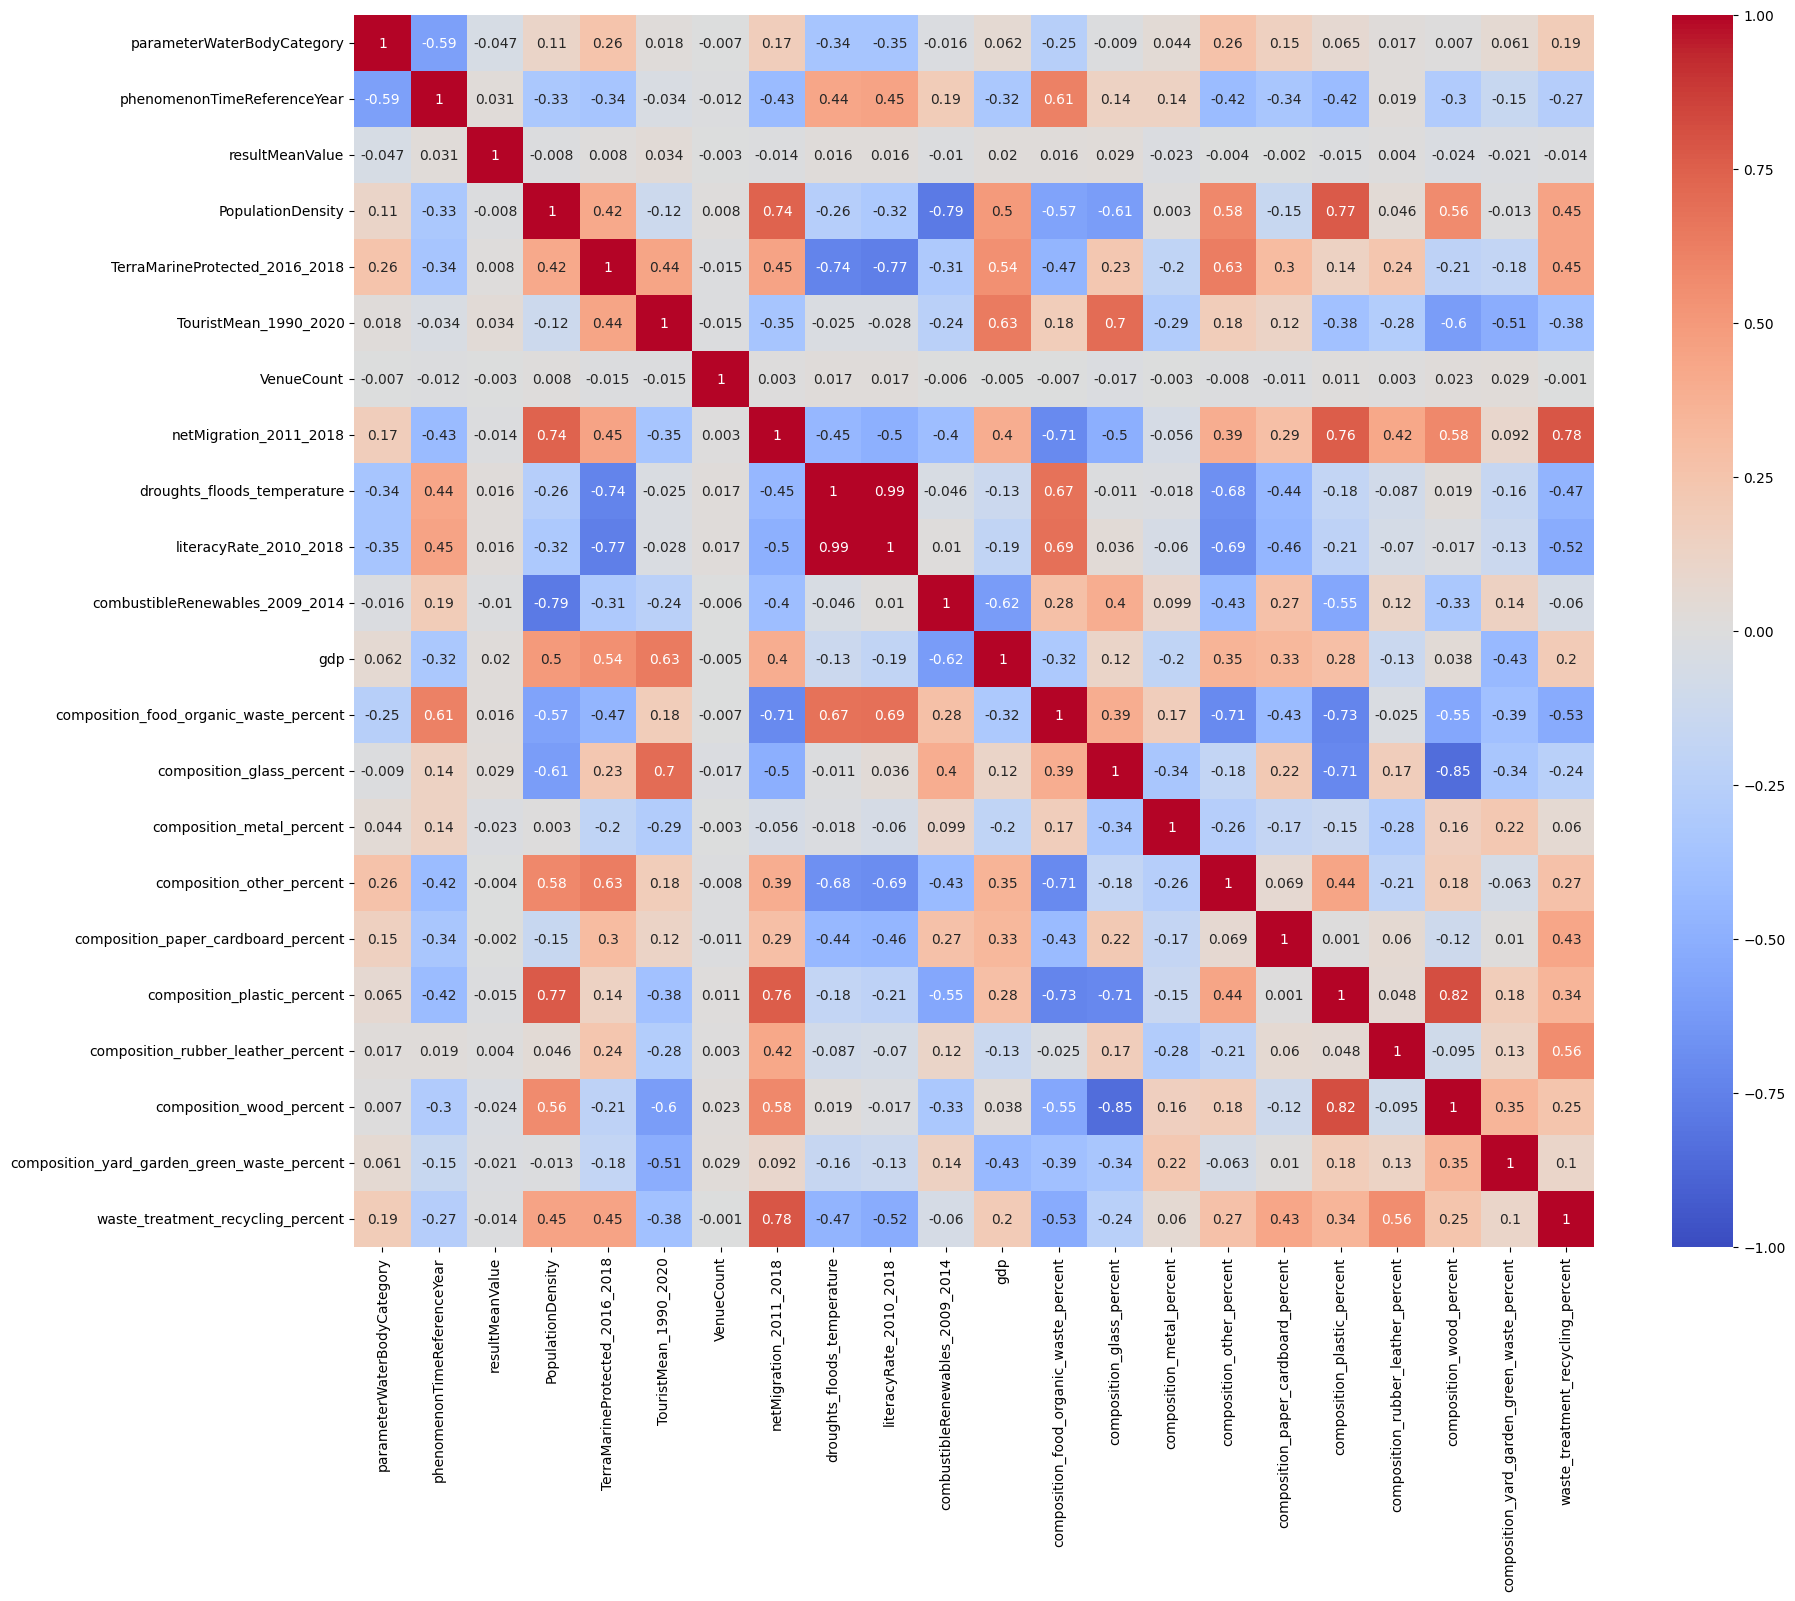

In [37]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr().round(3), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [38]:
corr =  df.corr()

threshold = 0.5
high_corr = corr[(corr >= threshold) & (corr < 1)]


high_corr

cleaned_high_corr = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

cleaned_high_corr

,phenomenonTimeReferenceYear,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_other_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,waste_treatment_recycling_percent
phenomenonTimeReferenceYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611355,NaN,NaN,NaN,NaN,NaN,NaN
PopulationDensity,NaN,NaN,NaN,NaN,0.741877,NaN,NaN,NaN,NaN,NaN,0.582593,0.77016,NaN,0.563412,NaN
TerraMarineProtected_2016_2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543050,NaN,NaN,0.626544,NaN,NaN,NaN,NaN
TouristMean_1990_2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633442,NaN,0.698485,NaN,NaN,NaN,NaN,NaN
netMigration_2011_2018,NaN,0.741877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76365,NaN,0.583364,0.784151
droughts_floods_temperature,NaN,NaN,NaN,NaN,NaN,NaN,0.992655,NaN,0.672807,NaN,NaN,NaN,NaN,NaN,NaN
literacyRate_2010_2018,NaN,NaN,NaN,NaN,NaN,0.992655,NaN,NaN,0.687051,NaN,NaN,NaN,NaN,NaN,NaN
gdp,NaN,NaN,0.543050,0.633442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
composition_food_organic_waste_percent,0.611355,NaN,NaN,NaN,NaN,0.672807,0.687051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
composition_glass_percent,NaN,NaN,NaN,0.698485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
cleaned_high_corr.shape

(15, 15)

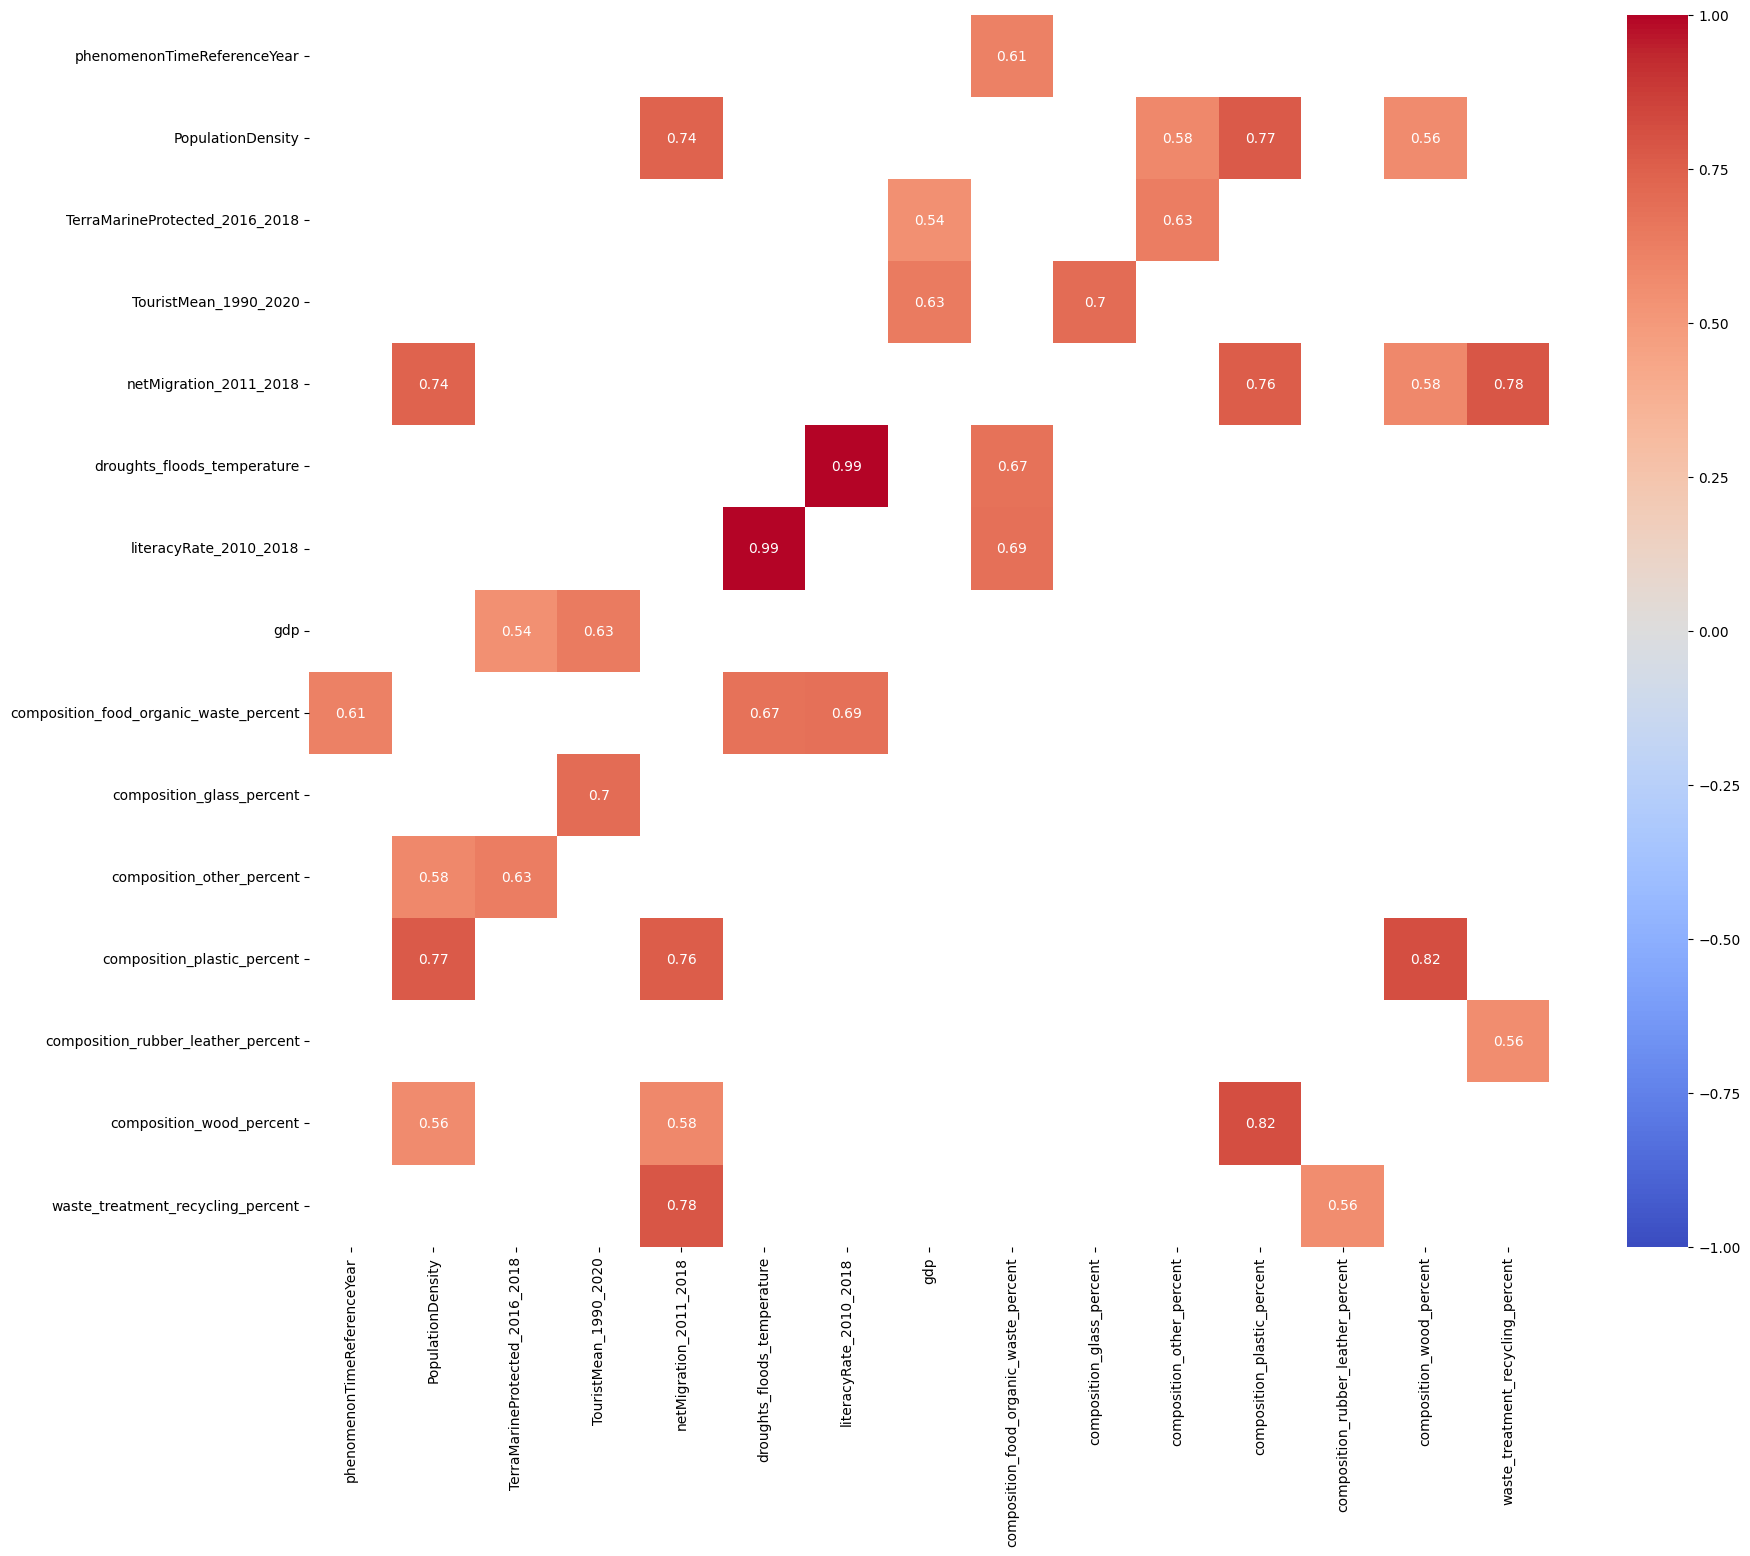

In [40]:
plt.figure(figsize=(20, 16))
sns.heatmap(cleaned_high_corr.round(3), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [41]:
cleaned_high_corr.shape

(15, 15)

In [42]:
df = cleaned_high_corr

df.columns

Index(['phenomenonTimeReferenceYear', 'PopulationDensity',
       'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020',
       'netMigration_2011_2018', 'droughts_floods_temperature',
       'literacyRate_2010_2018', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_other_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')